<a href="https://qworld.net" target="_blank" align="left"><img src="../qworld/images/header.jpg"  align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

<font style="font-size:28px;" align="left"><b> <font color="blue"> Solutions for </font>Superposition and Measurement </b></font>
<br>
_prepared by Abuzer Yakaryilmaz_
<br><br>

<a id="task3"></a>
<h3> Task 3</h3>

Repeat the second experiment with the following modifications.

Start in state $ \ket{1} $.

Apply a Hadamard gate.

Make a measurement. 

If the measurement outcome is 0, stop.

Otherwise, apply a second Hadamard, and then make a measurement.

Execute your circuit 1000 times.

Calculate the expected values of observing '0' and '1', and then compare your result with the simulator result.

<h3> Solution </h3>

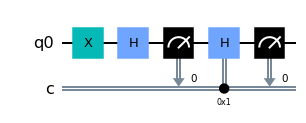

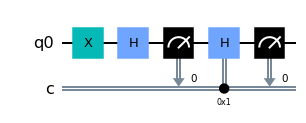

In [1]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

# define a quantum register with a single qubit
q = QuantumRegister(1)
# define a classical register with a single bit
c = ClassicalRegister(1,"c")
# define a quantum circuit
qc = QuantumCircuit(q,c)

# start in state |1>
qc.x(q[0])

# apply the first Hadamard
qc.h(q[0])

# the first measurement
qc.measure(q,c)

# apply the second Hadamard if the measurement outcome is 1
qc.h(q[0]).c_if(c,1)

# the second measurement
qc.measure(q[0],c)

# draw the circuit
display(qc.draw(output="mpl"))

We expect to see outcome '0' and '1' with frequency %75 and %25, respectively.

In [2]:
# execute the circuit 1000 times in the local simulator

job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(qc)   
print(counts)

{'1': 245, '0': 755}


<a id="task4"></a>
<h3> Task 4</h3>

Design the following quantum circuit.

Start in state $ \ket{0} $.

    Repeat 3 times:
        if the classical bit is 0:
            apply a Hadamard operator
        make a measurement

Execute your circuit 1000 times.

Calculate the expected values of observing '0' and '1', and then compare your result with the simulator result.

<h3> Solution </h3>

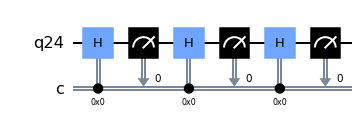

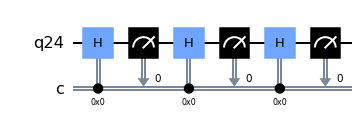

In [5]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

# define a quantum register with a single qubit
q = QuantumRegister(1)
# define a classical register with a single bit
c = ClassicalRegister(1,"c")
# define a quantum circuit
qc = QuantumCircuit(q,c)

for i in range(3):
    qc.h(q[0]).c_if(c,0)
    qc.measure(q,c)

# draw the circuit
qc.draw(output="mpl")

We start in state $ \ket{0} $. Thus, the first Hadamard and measurement are implemented. 

Out of 1000, we expect to observe 500 '0' and 500 '1'.

If the classical bit is 1, then there will be no further Hadamard operator, and so the quantum register will always be in state $ \ket{1} $ and so all measurements results will be 1.

If the classical bit is 0, then another Hadamard applied followed by a measuement.

Thus, out ouf 1000, we expect to observe 250 '0' and 750 '1'.

Similarly, after the third control, we expect to observe 125 '0' and 875 '1'.

In [6]:
# execute the circuit 1000 times in the local simulator

job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(qc)   
print(counts)

{'0': 133, '1': 867}


<a id="task5"></a>
<h3> Task 5</h3>

Design the following randomly created quantum circuit.

Start in state $ \ket{0} $.

    apply a Hadamard operator
    make a measurement
    REPEAT 4 times: 
        randomly pick x in {0,1}
        if the classical bit is x:
            apply a Hadamard operator
        make a measurement
        
Draw your circuit, and guess the expected frequency of observing '0' and '1' if the circuit is executed 10000 times.

Then, execute your circuit 10000 times, and compare your result with the simulator result.

Repeat execution a few more times.

<h3> Solution </h3>

We can calculate the frequencies iteratively by python.

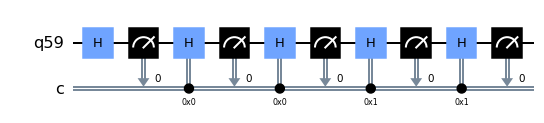

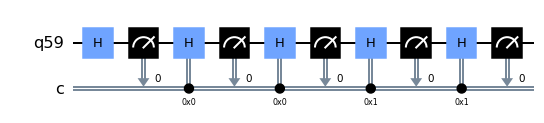

In [12]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
# import randrange for random choices
from random import randrange

# define a quantum register with a single qubit
q = QuantumRegister(1)
# define a classical register with a single bit
c = ClassicalRegister(1,"c")
# define a quantum circuit
qc = QuantumCircuit(q,c)

shot = 10000

observe = [0,0]

qc.h(q[0])
qc.measure(q,c)
observe = [shot/2,shot/2]

for i in range(4):
    x = randrange(2)
    if x==0:
        observe[0] = observe[0] / 2 
        observe[1] = observe[1] + observe[0]
    else:
        observe[1] = observe[1] / 2 
        observe[0] = observe[0] + observe[1]
    qc.h(q[0]).c_if(c,x)
    qc.measure(q,c)

# draw the circuit
display(qc.draw(output="mpl"))

In [13]:
print('0:',round(observe[0]),'1:',round(observe[1]))

# execute the circuit 10000 times in the local simulator
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=shot)
counts = job.result().get_counts(qc)   
print(counts)

0: 7812 1: 2188
{'1': 2174, '0': 7826}
